In [2]:
#supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import os
_stderr = sys.stderr
null = open(os.devnull,'wb')

In [4]:
pwd

'/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus'

In [5]:
!mkdir -p Zhu_et_al/data

In [4]:
import os
work_dir = 'Zhu_et_al'

In [7]:
import scanpy as sc
#set some figure parameters for nice display inside jupyternotebooks.
%matplotlib inline
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(5, 5), facecolor='white')

#make a directory for to store the processed scRNA-seq data.
if not os.path.exists(os.path.join(work_dir, 'scRNA')):
    os.makedirs(os.path.join(work_dir, 'scRNA'))

In [9]:
adata = sc.read_h5ad(os.path.join(work_dir, 'data/10x_scRNA-seq_from_human_cortex.h5ad'))


In [10]:
adata

AnnData object with n_obs × n_vars = 45549 × 30113
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [12]:
adata.obs   ## metada for cells.

,author_cell_type,age_group,donor_id,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,TSS_percentile,nucleosome_signal,percent_mt,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
4_AAACAGCCAACACTTG-1,EN-fetal-late,late fetal,LaFet1,3483,1685.0,4518.0,4024.0,0.31,1.103503,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,t<2(H>sg#K
4_AAACAGCCACCAAAGG-1,EN-fetal-late,late fetal,LaFet1,4863,2149.0,4641.0,4128.0,0.72,1.002789,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,HPU?^1i&Yf
4_AAACAGCCATAAGTTC-1,EN-fetal-late,late fetal,LaFet1,11069,3707.0,12512.0,10169.0,0.51,1.054060,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,vKJ1WULiG^
4_AAACATGCATAGTCAT-1,EN-fetal-late,late fetal,LaFet1,7990,2919.0,5437.0,4844.0,0.47,1.141570,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,FE0>j_!1Tq
4_AAACATGCATTGTCAG-1,EN-fetal-late,late fetal,LaFet1,6873,2652.0,5268.0,4626.0,0.48,1.137788,0.021418,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,3sotId$RTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150666_TTTGTGAAGACAACAG-1,Oligodendrocytes,adulthood,Adult1,926,545.0,6654.0,5913.0,0.34,1.029844,1.500938,...,tissue,oligodendrocyte,10x multiome,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,=x`E$@Xdkm
150666_TTTGTGAAGGCTGTGC-1,OPC,adulthood,Adult1,1578,1023.0,5996.0,5311.0,0.03,0.712973,0.121433,...,tissue,oligodendrocyte precursor cell,10x multiome,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,#bnI9b>C>}
150666_TTTGTGAAGTAAGAAC-1,Oligodendrocytes,adulthood,Adult1,352,303.0,4787.0,4226.0,0.44,1.304045,0.939702,...,tissue,oligodendrocyte,10x multiome,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,mN;XZnza^;


In [13]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
gene_ids,,,,,
ENSG00000238009,False,RP11-34P13.7,NCBITaxon:9606,gene,3726
ENSG00000241860,False,RP11-34P13.13,NCBITaxon:9606,gene,7559
ENSG00000229905,False,RP11-206L10.4,NCBITaxon:9606,gene,456
ENSG00000237491,False,LINC01409,NCBITaxon:9606,gene,8413
ENSG00000177757,False,FAM87B,NCBITaxon:9606,gene,1947
...,...,...,...,...,...
ENSG00000273748,False,ENSG00000273748.1,NCBITaxon:9606,gene,372
ENSG00000271254,False,ENSG00000271254.6,NCBITaxon:9606,gene,4520
ENSG00000276345,False,ENSG00000276345.1,NCBITaxon:9606,gene,740


In [30]:
adata.obsm['X_umap'].shape

(45549, 2)

In [33]:
adata.var.shape

(30113, 5)

In [40]:
adata.var_names

Index(['ENSG00000238009', 'ENSG00000241860', 'ENSG00000229905',
       'ENSG00000237491', 'ENSG00000177757', 'ENSG00000228794',
       'ENSG00000225880', 'ENSG00000230368', 'ENSG00000272438',
       'ENSG00000230699',
       ...
       'ENSG00000274847', 'ENSG00000276256', 'ENSG00000278198',
       'ENSG00000273496', 'ENSG00000278384', 'ENSG00000273748',
       'ENSG00000271254', 'ENSG00000276345', 'ENSG00000278817',
       'ENSG00000277196'],
      dtype='object', name='gene_ids', length=30113)

In [42]:
import numpy as np

In [43]:
np.unique(adata.var_names, return_counts=True)

(array(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419', ...,
        'ENSG00000288253', 'ENSG00000288321', 'ENSG00000288398'],
       dtype=object),
 array([1, 1, 1, ..., 1, 1, 1]))

In [46]:
var_names_unique, counts = np.unique(adata.var_names, return_counts=True)

In [47]:
var_names_unique

array(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419', ...,
       'ENSG00000288253', 'ENSG00000288321', 'ENSG00000288398'],
      dtype=object)

In [48]:
counts

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
np.all(counts == 1)

True

In [50]:
# our gene ids are unique so there are no duplicates. In Python, we will most of the time use the functions from numpy and pandas libraries.

In [52]:
import pandas as pd

In [53]:
pd

<module 'pandas' from '/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/pandas/__init__.py'>

In [54]:
np

<module 'numpy' from '/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/numpy/__init__.py'>

In [55]:
len(var_names_unique)

30113

In [57]:
sc

<module 'scanpy' from '/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/__init__.py'>

In [58]:
sc.pp.filter_cells(adata, min_genes=200)

In [59]:
sc.pp.filter_genes(adata, min_cells=3)

In [60]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,n_cells
gene_ids,,,,,,
ENSG00000238009,False,RP11-34P13.7,NCBITaxon:9606,gene,3726,235
ENSG00000241860,False,RP11-34P13.13,NCBITaxon:9606,gene,7559,567
ENSG00000229905,False,RP11-206L10.4,NCBITaxon:9606,gene,456,26
ENSG00000237491,False,LINC01409,NCBITaxon:9606,gene,8413,3376
ENSG00000177757,False,FAM87B,NCBITaxon:9606,gene,1947,13
...,...,...,...,...,...,...
ENSG00000273748,False,ENSG00000273748.1,NCBITaxon:9606,gene,372,8182
ENSG00000271254,False,ENSG00000271254.6,NCBITaxon:9606,gene,4520,1047
ENSG00000276345,False,ENSG00000276345.1,NCBITaxon:9606,gene,740,20


In [61]:
adata

AnnData object with n_obs × n_vars = 45549 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [63]:
adata.shape # to check for dimensions.

(45549, 30109)

In [64]:
sc.external.pp.scrublet(adata) #estimates doublets

/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 2.7%
Estimated detectable doublet fraction = 68.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.9%


In [65]:
adata.obs

,author_cell_type,age_group,donor_id,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,TSS_percentile,nucleosome_signal,percent_mt,...,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,n_genes,doublet_score,predicted_doublet
index,,,,,,,,,,,,,,,,,,,,,
4_AAACAGCCAACACTTG-1,EN-fetal-late,late fetal,LaFet1,3483,1685.0,4518.0,4024.0,0.31,1.103503,0.000000,...,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,t<2(H>sg#K,1685,0.002589,False
4_AAACAGCCACCAAAGG-1,EN-fetal-late,late fetal,LaFet1,4863,2149.0,4641.0,4128.0,0.72,1.002789,0.000000,...,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,HPU?^1i&Yf,2148,0.007228,False
4_AAACAGCCATAAGTTC-1,EN-fetal-late,late fetal,LaFet1,11069,3707.0,12512.0,10169.0,0.51,1.054060,0.000000,...,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,vKJ1WULiG^,2466,0.013963,False
4_AAACATGCATAGTCAT-1,EN-fetal-late,late fetal,LaFet1,7990,2919.0,5437.0,4844.0,0.47,1.141570,0.000000,...,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,FE0>j_!1Tq,2616,0.005489,False
4_AAACATGCATTGTCAG-1,EN-fetal-late,late fetal,LaFet1,6873,2652.0,5268.0,4626.0,0.48,1.137788,0.021418,...,normal,Homo sapiens,male,cortical plate,unknown,23rd week post-fertilization human stage,3sotId$RTP,2594,0.003706,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150666_TTTGTGAAGACAACAG-1,Oligodendrocytes,adulthood,Adult1,926,545.0,6654.0,5913.0,0.34,1.029844,1.500938,...,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,=x`E$@Xdkm,841,0.020478,False
150666_TTTGTGAAGGCTGTGC-1,OPC,adulthood,Adult1,1578,1023.0,5996.0,5311.0,0.03,0.712973,0.121433,...,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,#bnI9b>C>},1040,0.034496,False
150666_TTTGTGAAGTAAGAAC-1,Oligodendrocytes,adulthood,Adult1,352,303.0,4787.0,4226.0,0.44,1.304045,0.939702,...,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,mN;XZnza^;,1083,0.006090,False


In [66]:
adata.obs['predicted_doublet']

index
4_AAACAGCCAACACTTG-1         False
4_AAACAGCCACCAAAGG-1         False
4_AAACAGCCATAAGTTC-1         False
4_AAACATGCATAGTCAT-1         False
4_AAACATGCATTGTCAG-1         False
                             ...  
150666_TTTGTGAAGACAACAG-1    False
150666_TTTGTGAAGGCTGTGC-1    False
150666_TTTGTGAAGTAAGAAC-1    False
150666_TTTGTGAAGTCTTGAA-1    False
150666_TTTGTTGGTGATCAGC-1    False
Name: predicted_doublet, Length: 45549, dtype: bool

In [67]:
adata = adata[adata.obs['predicted_doublet'] == False] #do the actual filtering
adata

View of AnnData object with n_obs × n_vars = 44330 × 30109
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title', 'scrublet'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [80]:
adata.var["feature_name"].str.startswith('MT-').value_counts() # Check mitochondrial feature names:

False    30096
True        13
Name: feature_name, dtype: int64

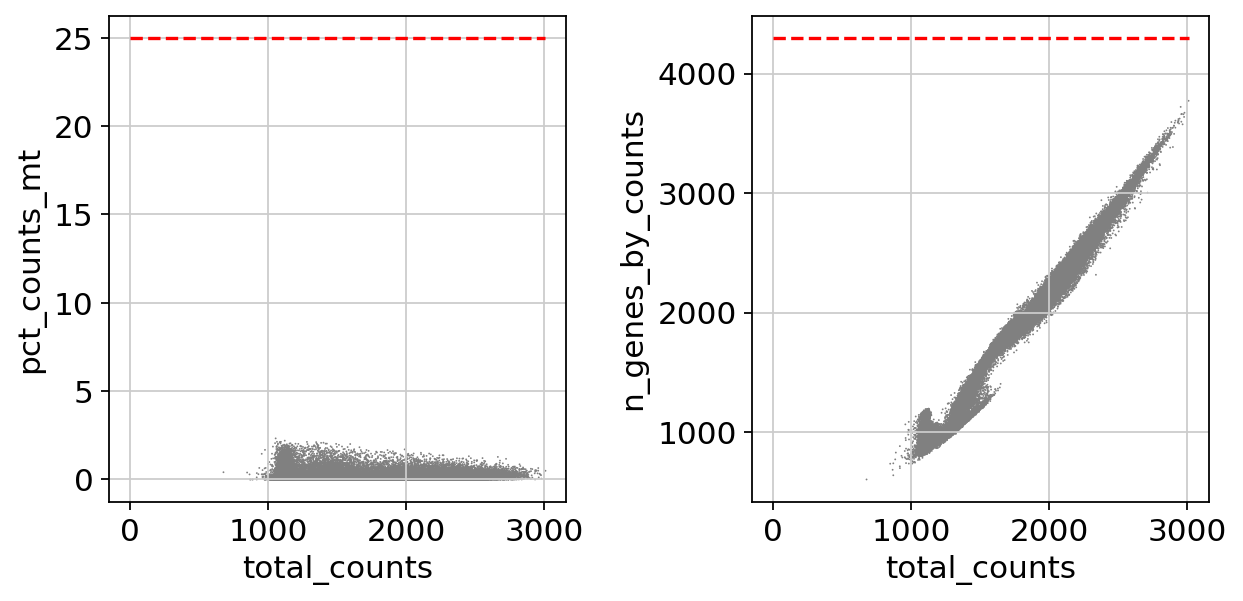

In [81]:
adata.var['mt'] = adata.var["feature_name"].str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
import matplotlib.pyplot as plt
mito_filter = 25
n_counts_filter = 4300
fig, axs = plt.subplots(ncols = 2, figsize = (8,4))
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', ax = axs[0], show=False)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', ax = axs[1], show = False)
#draw horizontal red lines indicating thresholds.
axs[0].hlines(y = mito_filter, xmin = 0, xmax = max(adata.obs['total_counts']), color = 'red', ls = 'dashed')
axs[1].hlines(y = n_counts_filter, xmin = 0, xmax = max(adata.obs['total_counts']), color = 'red', ls = 'dashed')
fig.tight_layout()
plt.show()

In [84]:
adata.var["mt"].value_counts()  # check if it is correctly added.

False    30096
True        13
Name: mt, dtype: int64

In [85]:
adata.var['mt']

gene_ids
ENSG00000238009    False
ENSG00000241860    False
ENSG00000229905    False
ENSG00000237491    False
ENSG00000177757    False
                   ...  
ENSG00000273748    False
ENSG00000271254    False
ENSG00000276345    False
ENSG00000278817    False
ENSG00000277196    False
Name: mt, Length: 30109, dtype: bool

In [98]:
adata

AnnData object with n_obs × n_vars = 44330 × 4092
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_

In [87]:
# Below the data will be normalized and scaled. This is only for visualization purposes. For the actual SCENIC+ analysis we will use the raw count matrix. For this reason we save the non-normalized and non-scaled AnnData object in the raw slot before carying on.

In [88]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [89]:
adata.obs

,author_cell_type,age_group,donor_id,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,TSS_percentile,nucleosome_signal,percent_mt,...,self_reported_ethnicity,development_stage,observation_joinid,n_genes,doublet_score,predicted_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
index,,,,,,,,,,,,,,,,,,,,,
4_AAACAGCCAACACTTG-1,EN-fetal-late,late fetal,LaFet1,3483,1685.0,4518.0,4024.0,0.31,1.103503,0.000000,...,unknown,23rd week post-fertilization human stage,t<2(H>sg#K,1685,0.002589,False,1685,1595.391724,0.000000,0.000000
4_AAACAGCCACCAAAGG-1,EN-fetal-late,late fetal,LaFet1,4863,2149.0,4641.0,4128.0,0.72,1.002789,0.000000,...,unknown,23rd week post-fertilization human stage,HPU?^1i&Yf,2148,0.007228,False,2148,2047.995728,0.000000,0.000000
4_AAACAGCCATAAGTTC-1,EN-fetal-late,late fetal,LaFet1,11069,3707.0,12512.0,10169.0,0.51,1.054060,0.000000,...,unknown,23rd week post-fertilization human stage,vKJ1WULiG^,2466,0.013963,False,2466,2177.337646,0.000000,0.000000
4_AAACATGCATAGTCAT-1,EN-fetal-late,late fetal,LaFet1,7990,2919.0,5437.0,4844.0,0.47,1.141570,0.000000,...,unknown,23rd week post-fertilization human stage,FE0>j_!1Tq,2616,0.005489,False,2616,2301.708252,0.000000,0.000000
4_AAACATGCATTGTCAG-1,EN-fetal-late,late fetal,LaFet1,6873,2652.0,5268.0,4626.0,0.48,1.137788,0.021418,...,unknown,23rd week post-fertilization human stage,3sotId$RTP,2594,0.003706,False,2594,2252.297119,0.693147,0.030775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150666_TTTGTGAAGACAACAG-1,Oligodendrocytes,adulthood,Adult1,926,545.0,6654.0,5913.0,0.34,1.029844,1.500938,...,unknown,20-year-old human stage,=x`E$@Xdkm,841,0.020478,False,841,953.665894,13.847195,1.451996
150666_TTTGTGAAGGCTGTGC-1,OPC,adulthood,Adult1,1578,1023.0,5996.0,5311.0,0.03,0.712973,0.121433,...,unknown,20-year-old human stage,#bnI9b>C>},1040,0.034496,False,1040,1352.420288,1.609438,0.119004
150666_TTTGTGAAGTAAGAAC-1,Oligodendrocytes,adulthood,Adult1,352,303.0,4787.0,4226.0,0.44,1.304045,0.939702,...,unknown,20-year-old human stage,mN;XZnza^;,1083,0.006090,False,1083,1098.090942,6.802395,0.619475


In [90]:
adata.obs["author_cell_type"]

index
4_AAACAGCCAACACTTG-1            EN-fetal-late
4_AAACAGCCACCAAAGG-1            EN-fetal-late
4_AAACAGCCATAAGTTC-1            EN-fetal-late
4_AAACATGCATAGTCAT-1            EN-fetal-late
4_AAACATGCATTGTCAG-1            EN-fetal-late
                                   ...       
150666_TTTGTGAAGACAACAG-1    Oligodendrocytes
150666_TTTGTGAAGGCTGTGC-1                 OPC
150666_TTTGTGAAGTAAGAAC-1    Oligodendrocytes
150666_TTTGTGAAGTCTTGAA-1    Oligodendrocytes
150666_TTTGTTGGTGATCAGC-1    Oligodendrocytes
Name: author_cell_type, Length: 44330, dtype: category
Categories (15, object): ['Astrocytes', 'EN', 'EN-fetal-early', 'EN-fetal-late', ..., 'Oligodendrocytes', 'Pericytes', 'RG', 'VSMC']

In [91]:
adata.obs["age_group"]

index
4_AAACAGCCAACACTTG-1         late fetal
4_AAACAGCCACCAAAGG-1         late fetal
4_AAACAGCCATAAGTTC-1         late fetal
4_AAACATGCATAGTCAT-1         late fetal
4_AAACATGCATTGTCAG-1         late fetal
                                ...    
150666_TTTGTGAAGACAACAG-1     adulthood
150666_TTTGTGAAGGCTGTGC-1     adulthood
150666_TTTGTGAAGTAAGAAC-1     adulthood
150666_TTTGTGAAGTCTTGAA-1     adulthood
150666_TTTGTTGGTGATCAGC-1     adulthood
Name: age_group, Length: 44330, dtype: category
Categories (6, object): ['adolescence', 'adulthood', 'childhood', 'early fetal', 'infancy', 'late fetal']

In [92]:
adata.obs['celltype'] = adata.obs["author_cell_type"]

In [93]:
adata.obs

,author_cell_type,age_group,donor_id,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,TSS_percentile,nucleosome_signal,percent_mt,...,development_stage,observation_joinid,n_genes,doublet_score,predicted_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,celltype
index,,,,,,,,,,,,,,,,,,,,,
4_AAACAGCCAACACTTG-1,EN-fetal-late,late fetal,LaFet1,3483,1685.0,4518.0,4024.0,0.31,1.103503,0.000000,...,23rd week post-fertilization human stage,t<2(H>sg#K,1685,0.002589,False,1685,1595.391724,0.000000,0.000000,EN-fetal-late
4_AAACAGCCACCAAAGG-1,EN-fetal-late,late fetal,LaFet1,4863,2149.0,4641.0,4128.0,0.72,1.002789,0.000000,...,23rd week post-fertilization human stage,HPU?^1i&Yf,2148,0.007228,False,2148,2047.995728,0.000000,0.000000,EN-fetal-late
4_AAACAGCCATAAGTTC-1,EN-fetal-late,late fetal,LaFet1,11069,3707.0,12512.0,10169.0,0.51,1.054060,0.000000,...,23rd week post-fertilization human stage,vKJ1WULiG^,2466,0.013963,False,2466,2177.337646,0.000000,0.000000,EN-fetal-late
4_AAACATGCATAGTCAT-1,EN-fetal-late,late fetal,LaFet1,7990,2919.0,5437.0,4844.0,0.47,1.141570,0.000000,...,23rd week post-fertilization human stage,FE0>j_!1Tq,2616,0.005489,False,2616,2301.708252,0.000000,0.000000,EN-fetal-late
4_AAACATGCATTGTCAG-1,EN-fetal-late,late fetal,LaFet1,6873,2652.0,5268.0,4626.0,0.48,1.137788,0.021418,...,23rd week post-fertilization human stage,3sotId$RTP,2594,0.003706,False,2594,2252.297119,0.693147,0.030775,EN-fetal-late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150666_TTTGTGAAGACAACAG-1,Oligodendrocytes,adulthood,Adult1,926,545.0,6654.0,5913.0,0.34,1.029844,1.500938,...,20-year-old human stage,=x`E$@Xdkm,841,0.020478,False,841,953.665894,13.847195,1.451996,Oligodendrocytes
150666_TTTGTGAAGGCTGTGC-1,OPC,adulthood,Adult1,1578,1023.0,5996.0,5311.0,0.03,0.712973,0.121433,...,20-year-old human stage,#bnI9b>C>},1040,0.034496,False,1040,1352.420288,1.609438,0.119004,OPC
150666_TTTGTGAAGTAAGAAC-1,Oligodendrocytes,adulthood,Adult1,352,303.0,4787.0,4226.0,0.44,1.304045,0.939702,...,20-year-old human stage,mN;XZnza^;,1083,0.006090,False,1083,1098.090942,6.802395,0.619475,Oligodendrocytes


/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


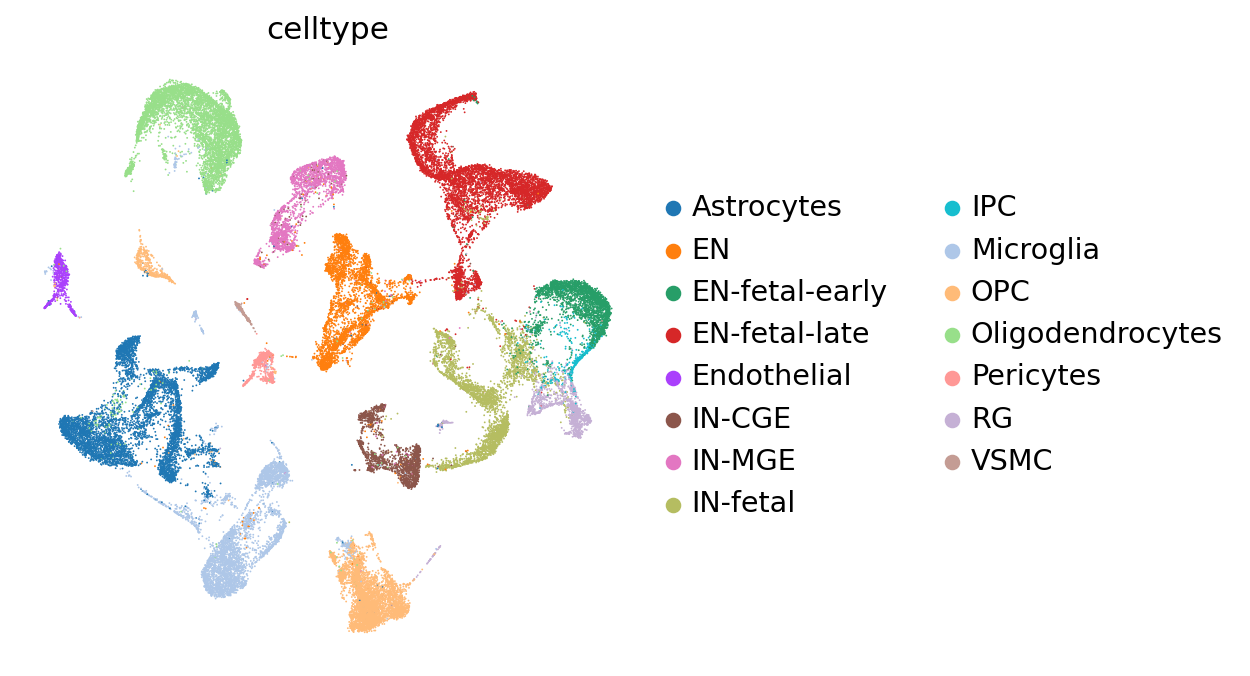

In [94]:
sc.pl.umap(adata, color = 'celltype')

In [96]:
adata.X.shape

(44330, 4092)

In [97]:
adata.X

array([[-0.06938884, -0.06297338, -0.13765407, ..., -0.33895442,
        -0.11016359, -0.5629595 ],
       [-0.06938884, -0.06297338, -0.13765407, ..., -0.33895442,
        -0.11016359, -0.5629595 ],
       [-0.06938884, -0.06297338, -0.13765407, ..., -0.33895442,
        -0.11016359, -0.5629595 ],
       ...,
       [-0.06938884, -0.06297338, -0.13765407, ..., -0.33895442,
        -0.11016359, -0.5629595 ],
       [-0.06938884, -0.06297338, -0.13765407, ..., -0.33895442,
        -0.11016359, -0.5629595 ],
       [-0.06938884, -0.06297338, -0.13765407, ..., -0.33895442,
        -0.11016359, -0.5629595 ]], dtype=float32)

In [99]:
if hasattr(adata, 'X'):
    print("Count matrix dimensions:", adata.X.shape)
else:
    print("Count matrix not found.")


Count matrix dimensions: (44330, 4092)


In [100]:
adata.write(os.path.join(work_dir, 'scRNA/adata_processed.h5ad'), compression='gzip')

In [101]:
import session_info

In [102]:
session_info.show()